In [2]:
import seaborn as sns

from scipy.stats import kurtosis, skew

from rcv_distribution import *
from rcv_dimensionality import *
from voting_rules import *

In [3]:
def get_gamma(mds, ballots):
    mcp = []
    mcp_num = []
    for k in mds:
        mcp.append(k)
        mcp_num.append(mds[k])
    
    temp = {}
    j = 0
    for i in range(len(mcp)):
        temp[mcp[i]] = j
        j += 1
    c = 0
    total = 0
    for b in ballots:
        if len(b) > 0:
            total += ballots[b] 
            b_num = []
            for candidate in b:
                if candidate in mcp:
                    b_num.append(temp[candidate])
            if (evaluate_ballot_consistency(b_num)[0] is True):
                c += ballots[b]
    
    return (c/total)

In [4]:
def frequency(ballots, candidates):
    result_freq = {}
    result_first = {}

    frequency = {}
    first = {}
    empty = 0
    for c in candidates:
        frequency[c] = 0
        first[c] = 0
    
    for b in ballots:
        if len(b) > 0:
            first[b[0]] += ballots[b]
        else:
            empty += ballots[b]
        for c in b:
            frequency[c] += ballots[b]
    
    total = sum(ballots.values())
    total -= empty 
    for c in frequency:
        result_freq[c] = (frequency[c]/total) * 100
    for c in first:
        result_first[c] = (first[c]/total) * 100
    
    list_freq = sorted(result_freq.items(), key=lambda x:x[1])
    print(list_freq)
    print()
    freq = []
    for t in list_freq:
        freq.append(t[0])
        
    return list_freq


In [18]:
def perform_MDS(csv, ignore):
    # Test the function with a custom CSV file
    ballots, candidates = parse_election_data(csv)
    list_freq = frequency(ballots, candidates)
    ignore_values = ['(WRITE-IN)', 'WRITE-IN', 'writein', 'Write-In', 'Write-in', 'skipped', 'overvote', 'Undeclared', 'undervote', 'Write in']
    if ignore:
        for (candidate, freq) in list_freq:
            if freq < 4:
                print("ignored: ", candidate, ": ", freq)
                ignore_values.append(candidate)

        ballots, candidates = parse_election_data(csv, ignore_values=ignore_values)

    # Perform the RCV analysis
    test = perform_rcv_analysis(csv, n_runs=1000, ignore_values=ignore_values)
    mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

    # Print the normalized distances between candidates and plot the MDS analysis
    normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
    print("Normalized distances:", normalized_distances)
    plot_rcv_analysis(mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names)

    # Get the consistency points for the bimodality analysis
    points = get_consistency_points(ballots, candidates, normalized_distances)

    # Create a list of data points
    data_points = []
    for key, value in points.items():
        data_points.extend([key] * value)

    # Convert to numpy array
    data_points = np.array(data_points)

    # Prepare data for histogram
    data_list = [x for x, count in points.items() for _ in range(count)]
    print(data_list)

    normalized_points = []
    normalized_names = []
    for name in normalized_distances:
        normalized_names.append(name)
        normalized_points.append(normalized_distances[name])

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data_list, bins=50, density=True, alpha=0.7)
    plt.title('Histogram of Data')
    plt.xticks(normalized_points, normalized_names, rotation=45)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    # Plot kernal density estimation
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data_list, fill=True)
    plt.title('Kernel Density Estimation of Data')
    plt.xticks(normalized_points, normalized_names, rotation=45)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    #ballots, candidates = parse_election_data(csv)

    # Calculate skewness and kurtosis
    g = skew(data_points)
    k = kurtosis(data_points)

    # Calculate bimodality coefficient
    n = len(data_points)
    bimodality = (g**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))
    print("Bimodality coefficient:", bimodality)
    print("Gamma coefficiet:", get_gamma(normalized_distances, ballots))




[('TYLER MARTIN', 0.024260067928190198), ('NANCY DIROCCO', 0.024260067928190198), ('BARBARA LABOMBARD', 0.024260067928190198), ('DON CARREY', 0.024260067928190198), ('JUSTIN PAYNE', 0.024260067928190198), ('PATRICK BROUGH', 0.024260067928190198), ('TYLER R. MULLALY', 0.024260067928190198), ('JAMES LINDLEY III', 0.024260067928190198), ('BURNS MAXEY', 0.024260067928190198), ('ZACHARY C.', 0.024260067928190198), ('FARLIN BLACK', 0.024260067928190198), ('DONAL CARBAUGH', 0.024260067928190198), ('WILL BUNDY', 0.024260067928190198), ('MEGAN FALLER', 0.024260067928190198), ('TRAVIS CONNOLLY', 0.024260067928190198), ('JEFFREY ROWLAND', 0.024260067928190198), ('DAN GILBERT', 0.024260067928190198), ('EVAN LEBEAU', 0.024260067928190198), ('JEFF BAGG', 0.024260067928190198), ('TROY GRAY', 0.024260067928190198), ('DUSTIN CHRISTENSEN', 0.024260067928190198), ('DAVID RANNIKKO', 0.024260067928190198), ('CHRISTOPHER MADSEN', 0.024260067928190198), ('MEGAN WARD HARVEY', 0.024260067928190198), ('JOHN STE

c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'NICOLE M. LACHAPELLE': 0.0, 'ERIC K. BERZINS': 1.039208932720386, 'KEITH M. ROUTHIER': 1.3635042889446718, 'DONALD W. TORREY': 3.0}


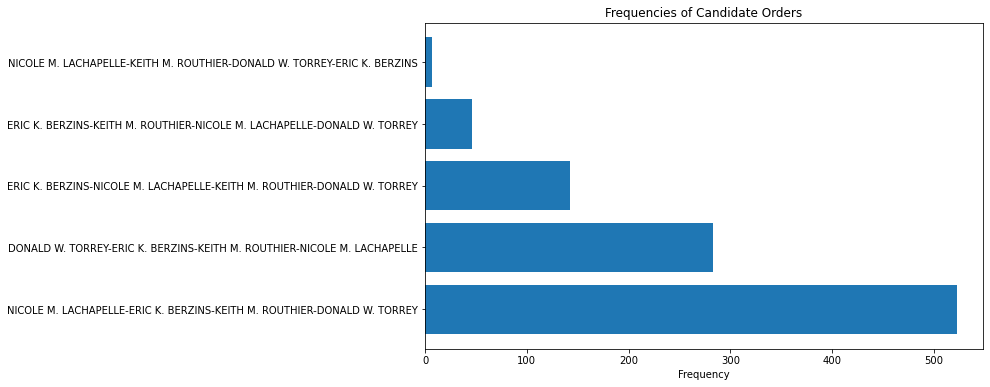

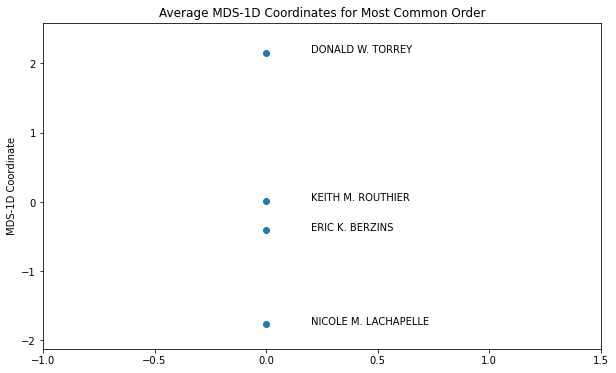

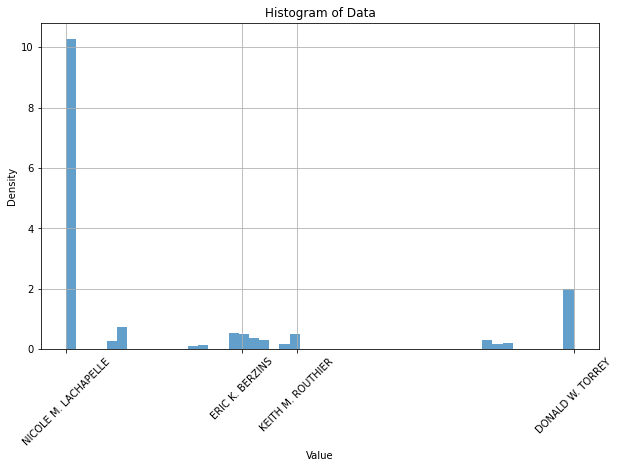

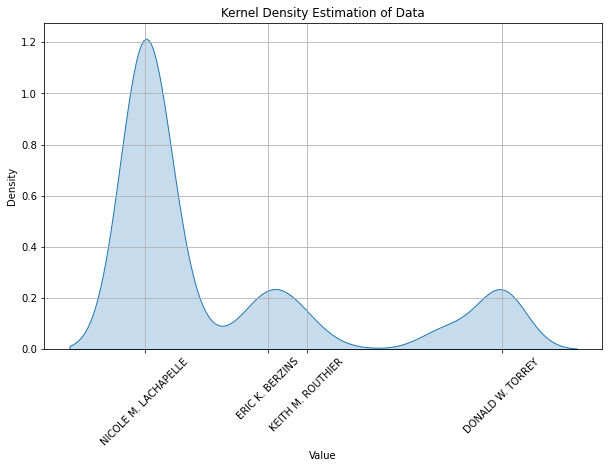

Bimodality coefficient: 0.867042650983911
Gamma coefficiet: 0.7712688381137579


In [7]:
csv = "dataverse_files/Easthampton_11022021_Mayor.csv"
perform_MDS(csv)

[('James "Jim" Seymour', 3.156934306569343), ('Elijah Norris-Holliday', 11.605839416058394), ('Suleiman Isse', 20.510948905109487), ('Cathy Spann', 22.51824817518248), ('Victor Martinez', 44.92700729927007), ('Jeremiah Ellison', 50.65693430656935), ('Kristel Porter', 54.12408759124088)]

ignored:  James "Jim" Seymour :  3.156934306569343


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'Elijah Norris-Holliday': 0.0, 'Jeremiah Ellison': 2.3098035841019255, 'Victor Martinez': 2.706072366796064, 'Kristel Porter': 2.9898510634561926, 'Suleiman Isse': 3.8912202341165036, 'Cathy Spann': 5.0}


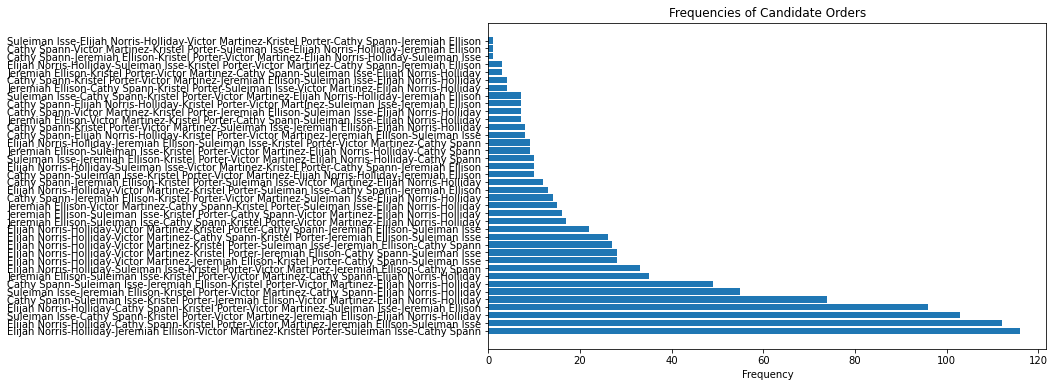

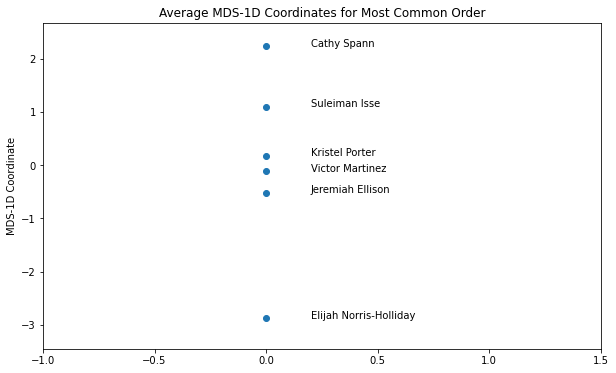

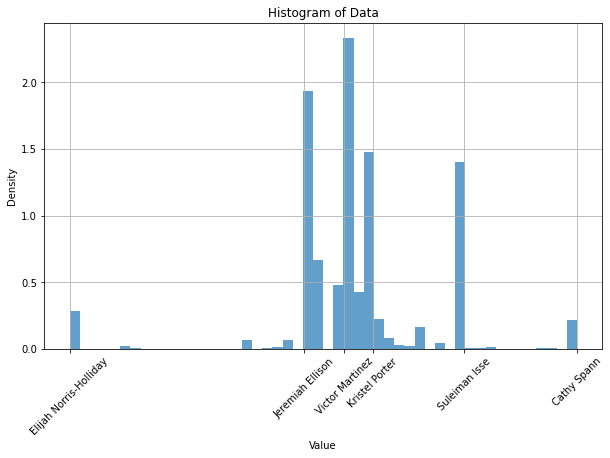

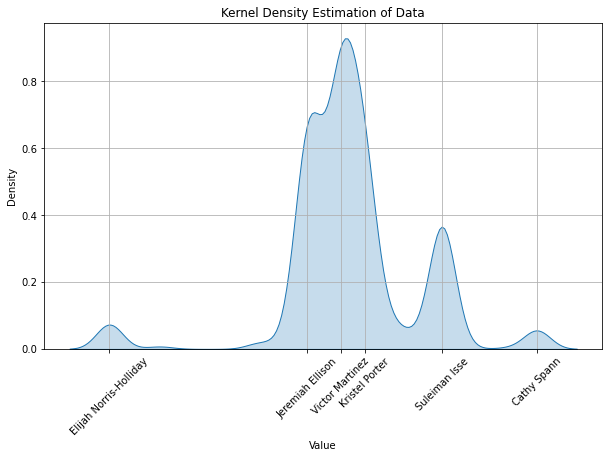

Bimodality coefficient: 0.1930387170093454
Gamma coefficiet: 0.5716898317483541


In [10]:
csv = "dataverse_files/Minneapolis_11022021_CityCouncilWard5.csv"
perform_MDS(csv)

[('James "Jim" Seymour', 3.156934306569343), ('Elijah Norris-Holliday', 11.605839416058394), ('Suleiman Isse', 20.510948905109487), ('Cathy Spann', 22.51824817518248), ('Victor Martinez', 44.92700729927007), ('Jeremiah Ellison', 50.65693430656935), ('Kristel Porter', 54.12408759124088)]



c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'James "Jim" Seymour': 0.0, 'Elijah Norris-Holliday': 2.2370834429713478, 'Victor Martinez': 3.6088153038708732, 'Kristel Porter': 3.8457922051144497, 'Suleiman Isse': 4.127062407265013, 'Cathy Spann': 4.914986860529623, 'Jeremiah Ellison': 6.0}


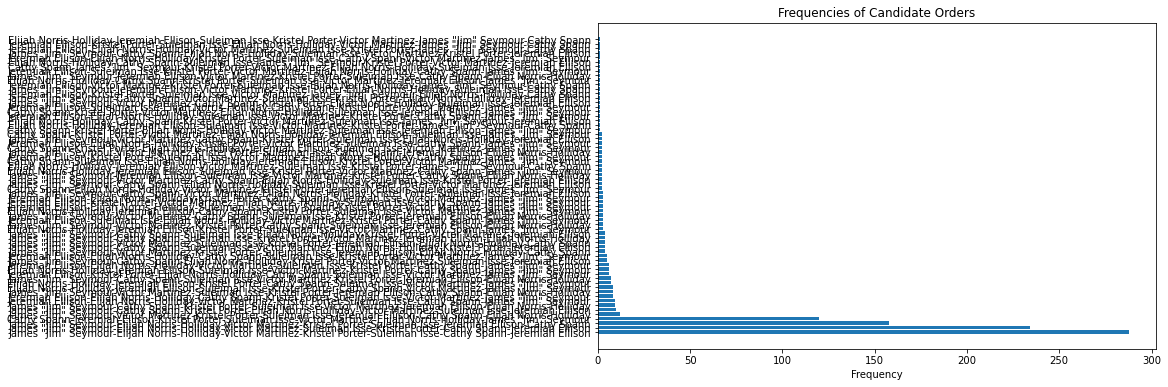

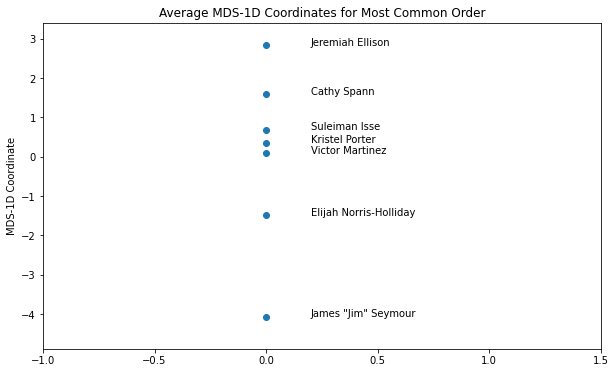

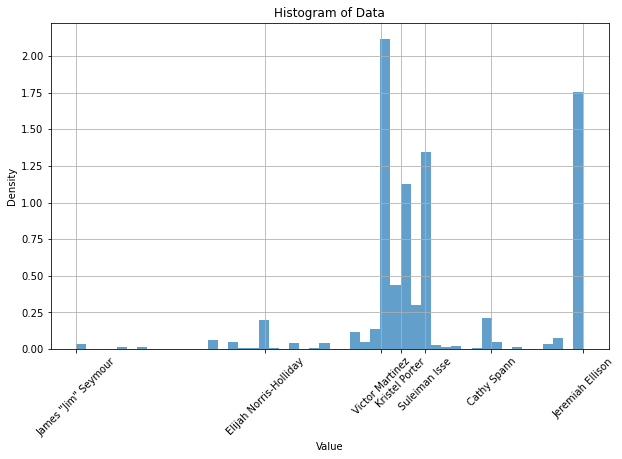

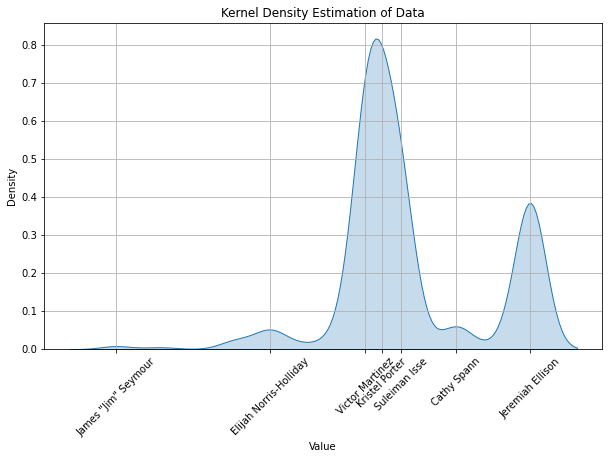

Bimodality coefficient: 0.2816155499710987
Gamma coefficiet: 0.49598540145985404


In [12]:
csv = "dataverse_files/Minneapolis_11022021_CityCouncilWard5.csv"
perform_MDS(csv)

[('Christopher Robin "CRZ" Zimmerman', 0.004864827298630898), ('Troy Benjegerdes', 0.9368267426506359), ('Paul E. Johnson', 1.0362082146083813), ('Kevin "No Body" Ward', 1.4684828688581555), ('Mike Winter', 2.0522621446938634), ('Christopher W David', 2.961984849537841), ('Doug Nelson', 3.3192021683230246), ('Nate "Honey Badger" Atkins', 3.340746403502676), ('Perry, Jerrell', 3.896031690874974), ('Mark Globus', 4.62714573632636), ('Marcus Harcus', 4.958648967961637), ('Bob "Again" Carney Jr', 5.538258391827091), ('Laverne Turner', 7.421641531725625), ('Clint Conner', 12.352491486552228), ('AJ Awed', 19.683786225588992), ('Sheila Nezhad', 41.357981791646395), ('Kate Knuth', 47.84349155604976), ('Jacob Frey', 55.95385363819585)]

ignored:  Christopher Robin "CRZ" Zimmerman :  0.004864827298630898
ignored:  Troy Benjegerdes :  0.9368267426506359
ignored:  Paul E. Johnson :  1.0362082146083813
ignored:  Kevin "No Body" Ward :  1.4684828688581555
ignored:  Mike Winter :  2.0522621446938634


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'Mark Globus': 0.0, 'Bob "Again" Carney Jr': 2.246912572881623, 'Kate Knuth': 3.5622196524908616, 'Clint Conner': 3.706002210476066, 'Jacob Frey': 3.9382536317347756, 'Sheila Nezhad': 4.209694880869173, 'AJ Awed': 4.622969859301781, 'Marcus Harcus': 6.484611416707158, 'Laverne Turner': 8.0}


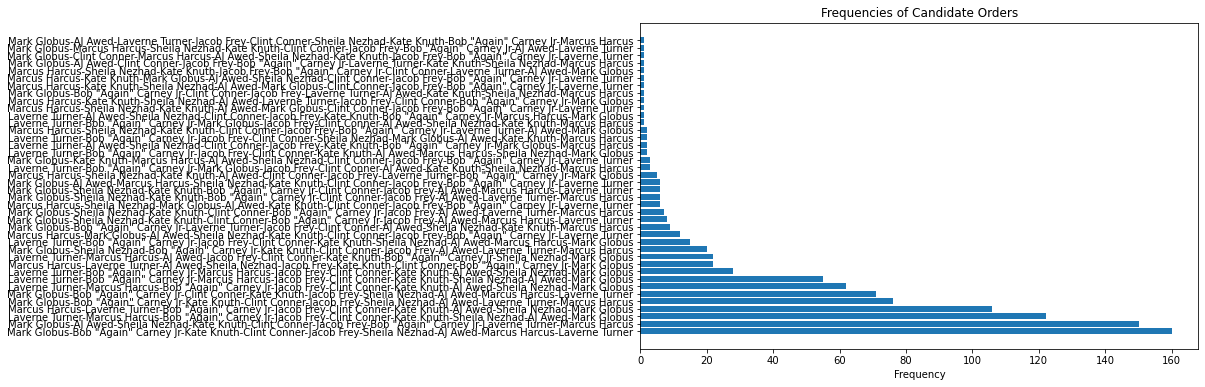

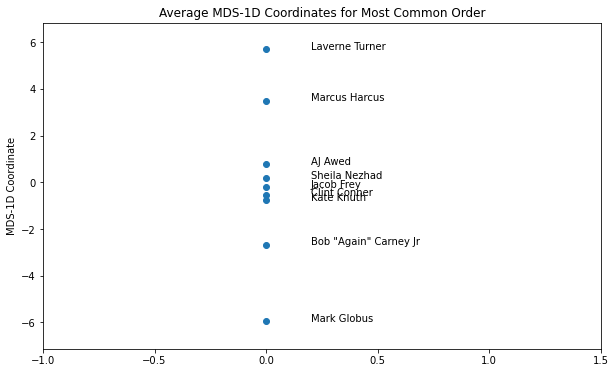

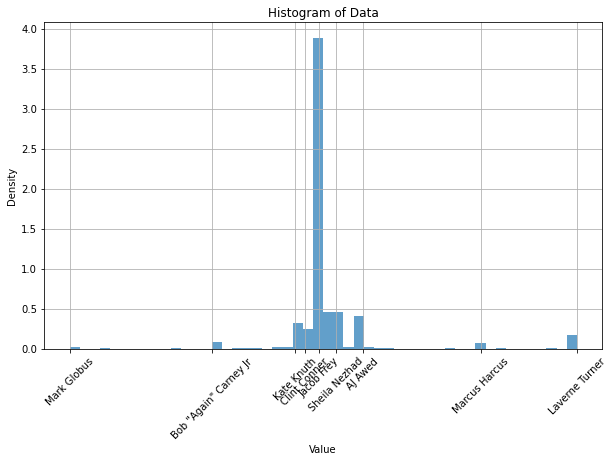

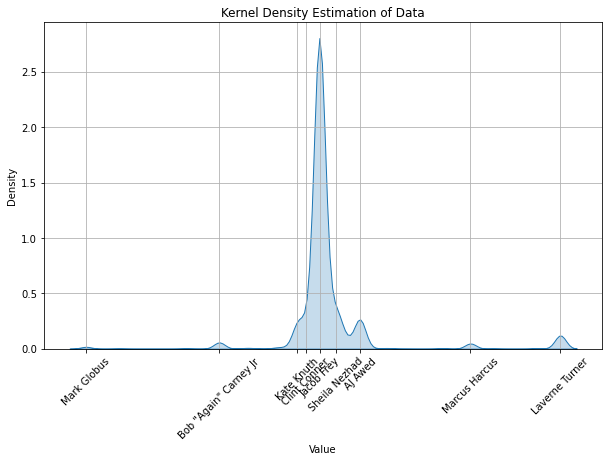

Bimodality coefficient: 0.43921541370873346
Gamma coefficiet: 0.41163586488737114


In [15]:
csv = "dataverse_files/Minneapolis_11022021_Mayor.csv"
perform_MDS(csv)

[('Christopher Robin "CRZ" Zimmerman', 0.004864827298630898), ('Troy Benjegerdes', 0.9368267426506359), ('Paul E. Johnson', 1.0362082146083813), ('Kevin "No Body" Ward', 1.4684828688581555), ('Mike Winter', 2.0522621446938634), ('Christopher W David', 2.961984849537841), ('Doug Nelson', 3.3192021683230246), ('Nate "Honey Badger" Atkins', 3.340746403502676), ('Perry, Jerrell', 3.896031690874974), ('Mark Globus', 4.62714573632636), ('Marcus Harcus', 4.958648967961637), ('Bob "Again" Carney Jr', 5.538258391827091), ('Laverne Turner', 7.421641531725625), ('Clint Conner', 12.352491486552228), ('AJ Awed', 19.683786225588992), ('Sheila Nezhad', 41.357981791646395), ('Kate Knuth', 47.84349155604976), ('Jacob Frey', 55.95385363819585)]



c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:159: RuntimeWarning: divide by zero encountered in true_divide
  frequencies = counts / mentioned_together
c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:159: RuntimeWarning: invalid value encountered in true_divide
  frequencies = counts / mentioned_together
c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'Christopher Robin "CRZ" Zimmerman': 0.0, 'Kate Knuth': 15.865425779341072, 'Bob "Again" Carney Jr': 15.866160458334534, 'Sheila Nezhad': 15.86761149503981, 'Laverne Turner': 16.9936686596347, 'Troy Benjegerdes': 16.99451204353706, 'Mike Winter': 16.995035657354148, 'Clint Conner': 16.995148010837024, 'Mark Globus': 16.995255865061008, 'Jacob Frey': 16.99541818569757, 'Paul E. Johnson': 16.99547750167784, 'Christopher W David': 16.995579203040798, 'Nate "Honey Badger" Atkins': 16.99560779698349, 'Marcus Harcus': 16.99581224039624, 'AJ Awed': 16.996053732207965, 'Perry, Jerrell': 16.996375031218623, 'Doug Nelson': 16.996931115957462, 'Kevin "No Body" Ward': 17.0}


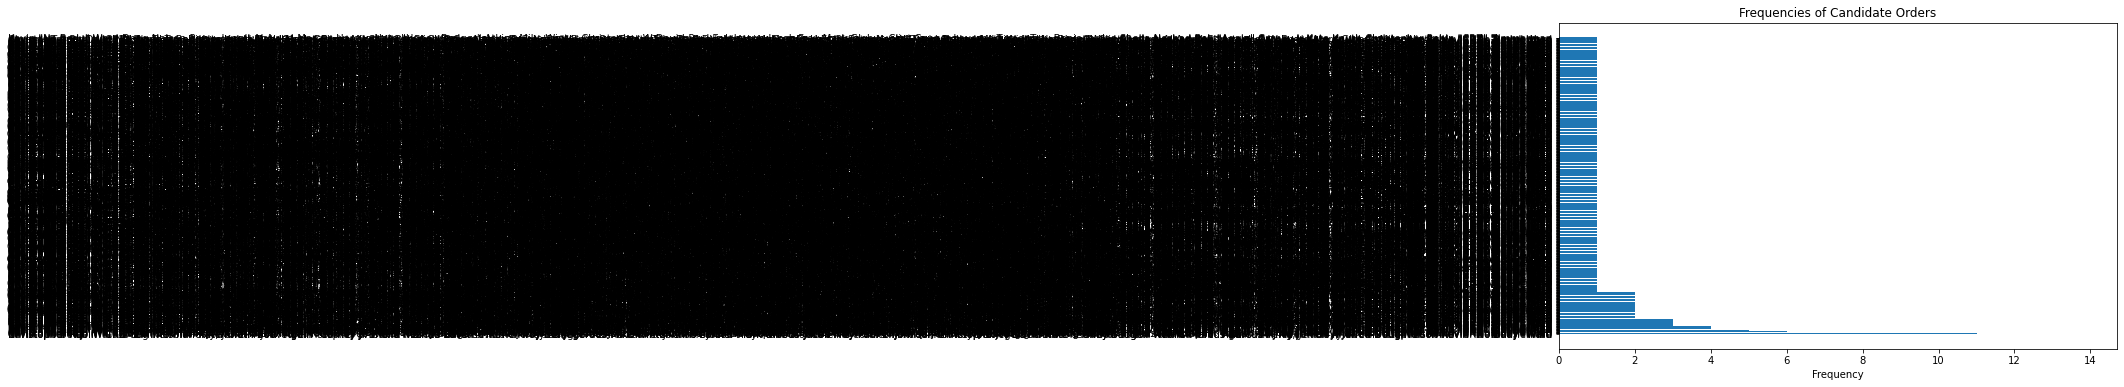

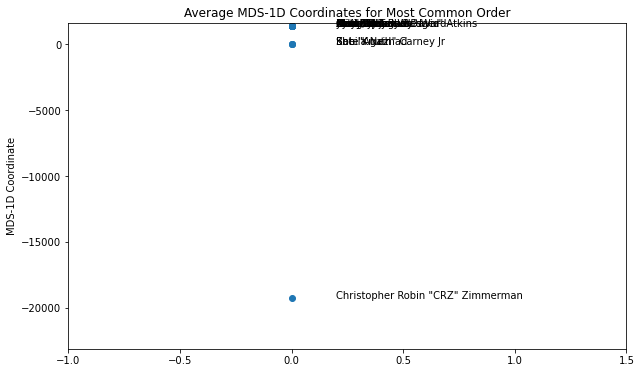

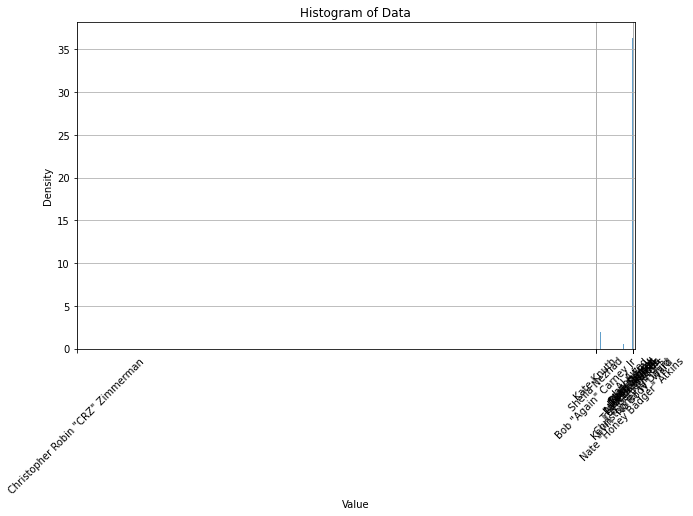

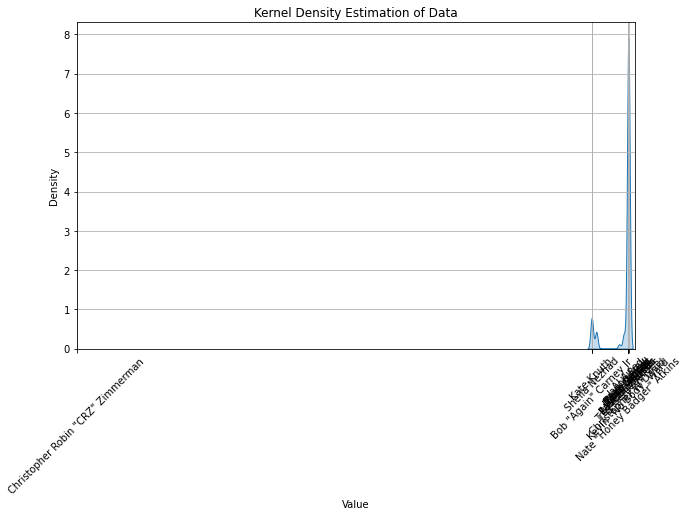

Bimodality coefficient: 0.9815891908052583
Gamma coefficiet: 0.330926402112725


In [19]:
csv = "dataverse_files/Minneapolis_11022021_Mayor.csv"
perform_MDS(csv, False)

[('EDMUND BERNARD BRUYERE', 0.25951775051021697), ('JOHN CHARLES WILSON', 0.26959610975333215), ('CYD GORMAN', 0.3388848295497493), ('JAMES "JIMMY" L. STROUD, JR.', 0.3905364206707148), ('BOB "AGAIN" CARNEY JR', 0.40691375444077704), ('RAHN V. WORKCUFF', 0.4258106780216181), ('BILL KAHN', 0.5543097583713371), ('MERRILL ANDERSON', 0.6361964272216483), ('JOHN LESLIE HARTWIG', 0.6588727355186575), ('JOSHUA REA', 0.6903676081533926), ('TROY BENJEGERDES', 0.8692584847186877), ('GREGG A. IVERSON', 0.9876792058252917), ('JEFFREY ALAN WAGNER', 1.022953463176195), ('KURTIS W. HANNA', 1.0821638237294968), ('TONY LANE', 1.094761772783391), ('ABDUL M RAHAMAN "THE ROCK"', 1.1590113129582504), ('NEAL BAXTER', 1.2207412633223311), ('JAYMIE KELLY', 1.2723928544432965), ('CHRISTOPHER ROBIN ZIMMERMAN', 1.2812114187810226), ('MIKE GOULD', 1.3807352163067852), ('CHRISTOPHER CLARK', 1.45506311572476), ('JAMES EVERETT', 2.1139358512434177), ('ALICIA K. BENNETT', 2.275189599133261), ('OLE SAVIOR', 2.58887853

c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'BOB FINE': 0.0, 'CAM WINTON': 1.7836628785990294, 'DAN COHEN': 2.001182128197567, 'DON SAMUELS': 2.7040030842244884, 'BETSY HODGES': 2.9015712595955834, 'JACKIE CHERRYHOMES': 3.0924162294689923, 'MARK ANDREW': 3.2321167338638843, 'STEPHANIE WOODRUFF': 7.0}


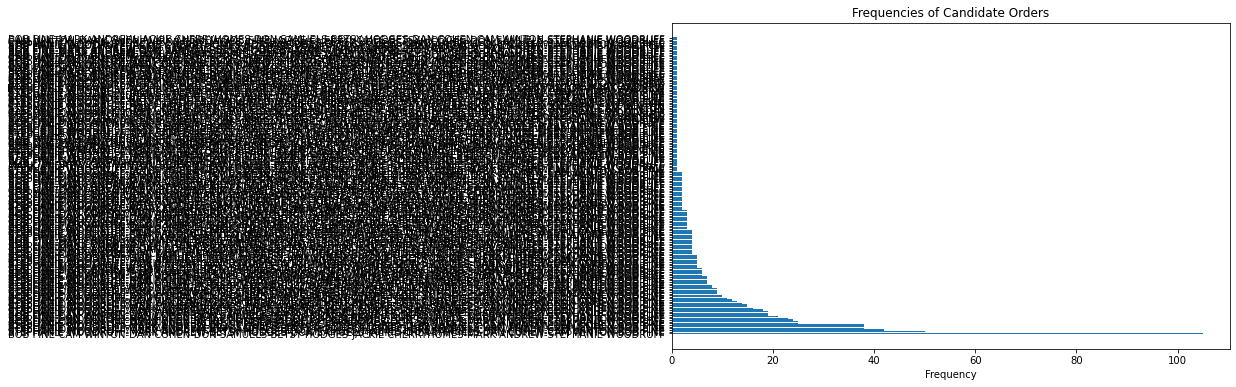

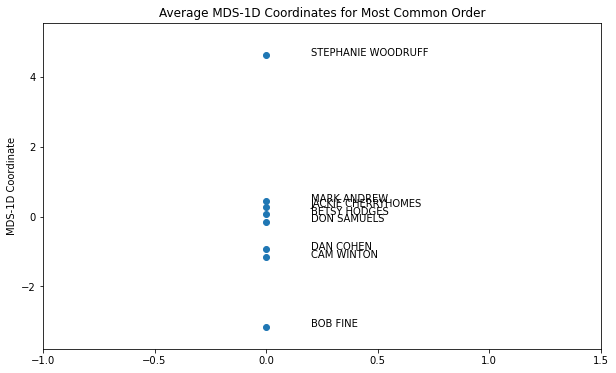

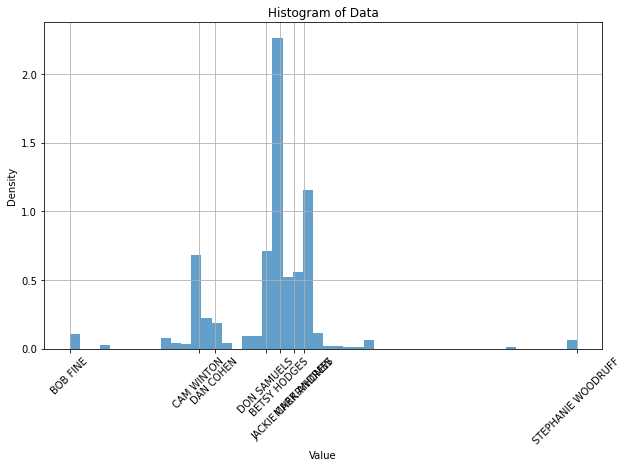

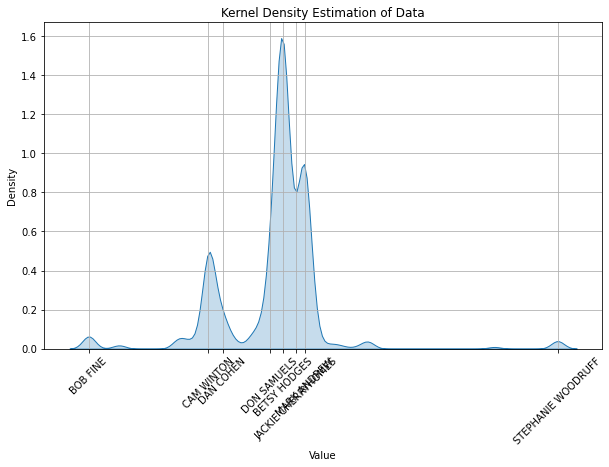

Bimodality coefficient: 0.10928159384903095
Gamma coefficiet: 0.42493416421140456


In [20]:
csv = "dataverse_files/Minneapolis_11052013_Mayor.csv"
perform_MDS(csv, True)

[('John Charles Wilson', 1.1295799027984288), ('Bill McGaughey', 2.481081201038592), ('Bob Carney Jr.', 2.634206963893389), ('James R. Everett', 2.982623554736912), ('Tom Fiske', 6.52005059807816), ('Joey Lombard', 6.923947537782118), ('Christopher Clark', 7.756152770688622), ('Dick Franson', 21.324426887996275), ('Papa John Kolstad', 21.450922083398062), ('Al Flowers', 21.615143916024945), ('R.T. Rybak', 82.04877832271809)]

ignored:  John Charles Wilson :  1.1295799027984288
ignored:  Bill McGaughey :  2.481081201038592
ignored:  Bob Carney Jr. :  2.634206963893389
ignored:  James R. Everett :  2.982623554736912


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'Joey Lombard': 0.0, 'Tom Fiske': 1.2749742871157357, 'R.T. Rybak': 2.028630000199048, 'Al Flowers': 2.1219834900227643, 'Papa John Kolstad': 2.6081668403752434, 'Dick Franson': 2.731366776326901, 'Christopher Clark': 6.0}


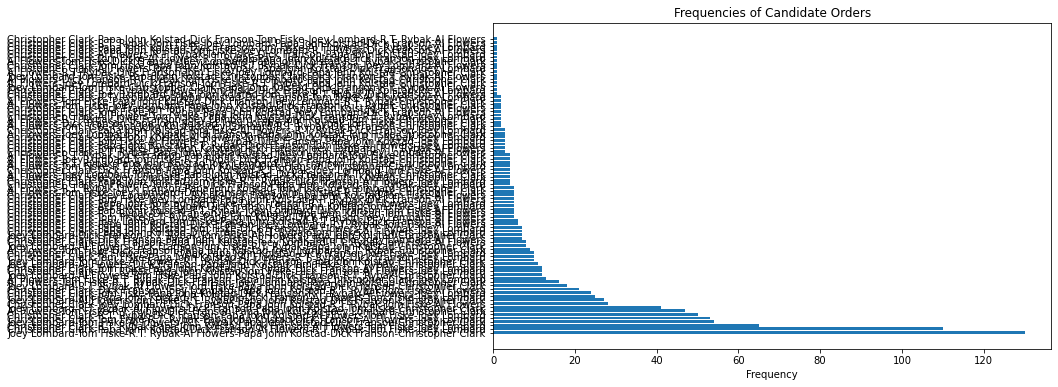

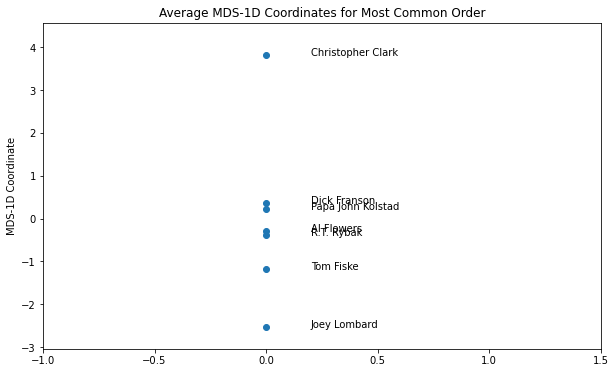

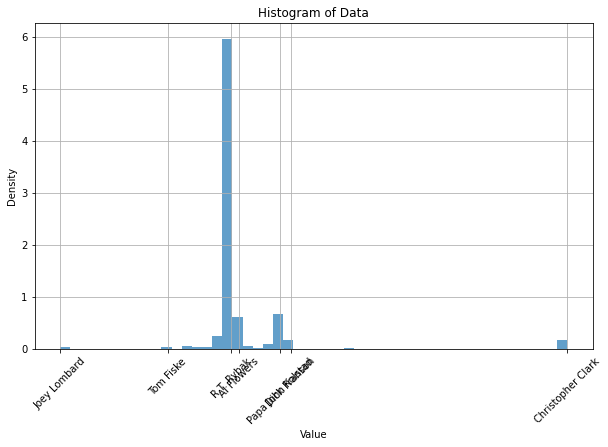

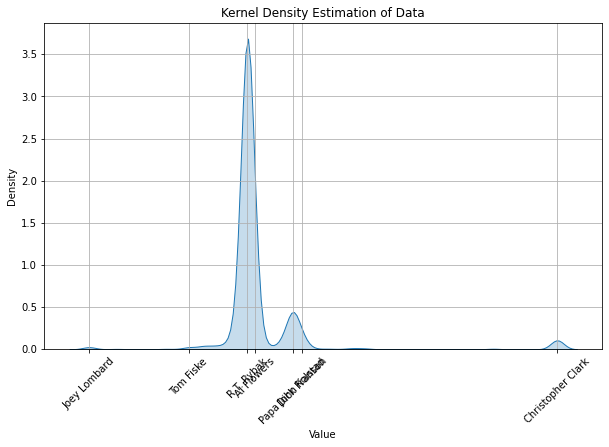

Bimodality coefficient: 0.7414302428991609
Gamma coefficiet: 0.6586635100728101


In [21]:
csv = "dataverse_files/Minneapolis_11062009_Mayor.csv"
perform_MDS(csv, True)